In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading the dataset

df = pd.read_csv("heart.csv")

# first 5 rows 
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### checking preliminary steps/ cleaning /missing/ duplicate values

In [5]:
# shape of our data
df.shape

# 303 rows and 14 columns
# output column is our target variable

(303, 14)

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Missing values
df.isna().mean()

# no missing values in our data

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

In [11]:
# duplicates

print("no.of duplicates in our data",df.duplicated().sum())

# 1 duplicate in our data
# I am just removing this duplicated data because, it might give wrong predictions

df = df.drop_duplicates()
print("after removing duplicates in our data",df.duplicated().sum())

no.of duplicates in our data 1
after removing duplicates in our data 0


In [12]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### chceking for outliers

In [14]:
df.age.value_counts().head()

58    19
57    17
54    16
59    14
52    13
Name: age, dtype: int64

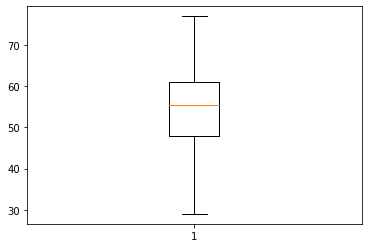

In [16]:
plt.boxplot(df.age)
plt.show()

age


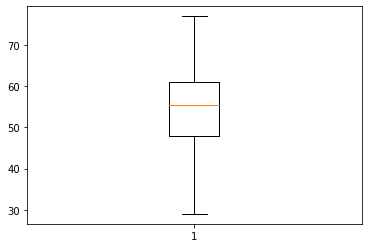

sex


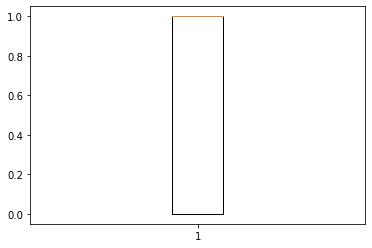

cp


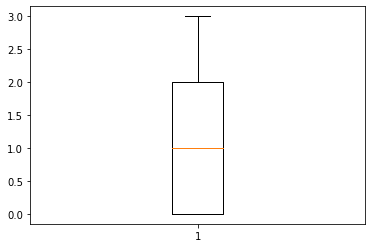

trtbps


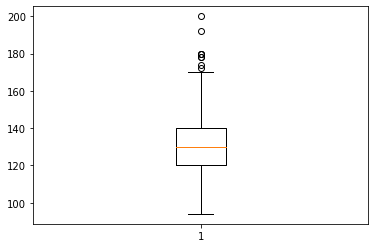

chol


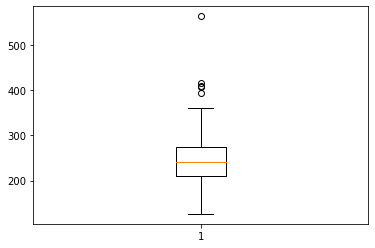

fbs


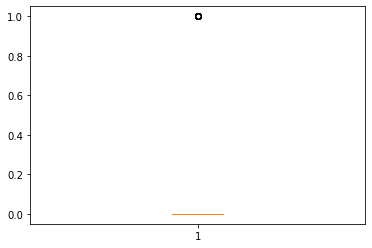

restecg


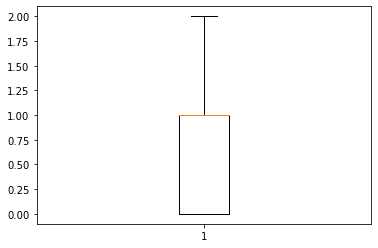

thalachh


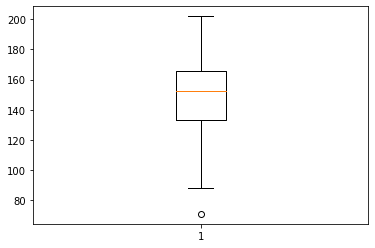

exng


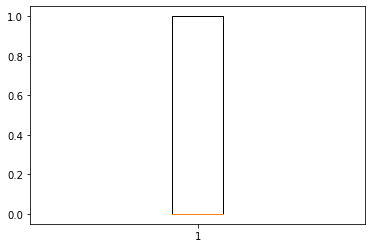

oldpeak


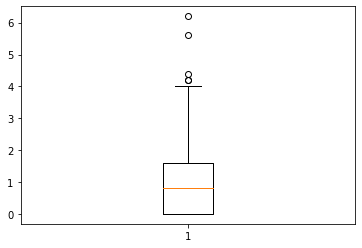

slp


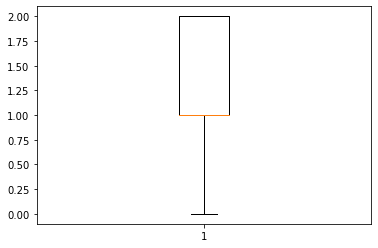

caa


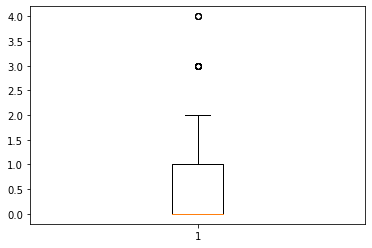

thall


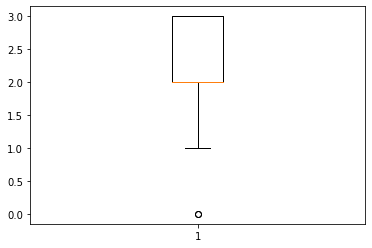

output


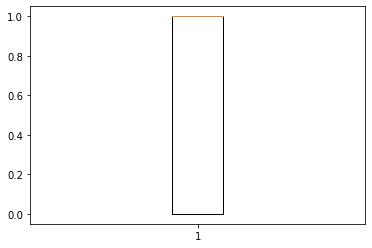

In [22]:
# using for loop we can visualize outliers for each column

for i in df.columns:
    print(i)
    plt.boxplot(df[i])
    plt.show()

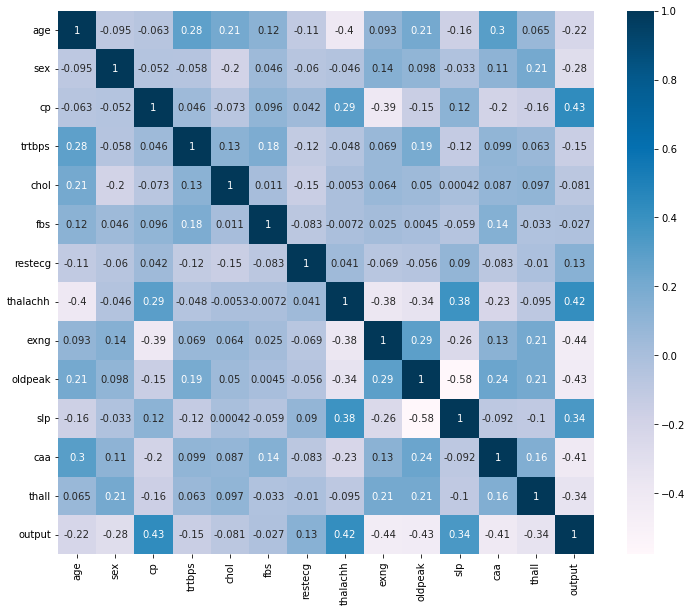

In [35]:
## checking the correlations

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap= "PuBu")
plt.show()

In [29]:
# # u can use list comprehesion also

# l = [plt.boxplot(df[i]) for i in df.columns]

# plt.show()

####  choosing logistic/linear or any other ML algorithm by using visualizations 

In [36]:
# plotting scatter plot between inputs and output

scatter plot between age and output 



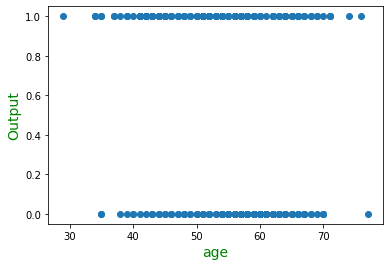

scatter plot between sex and output 



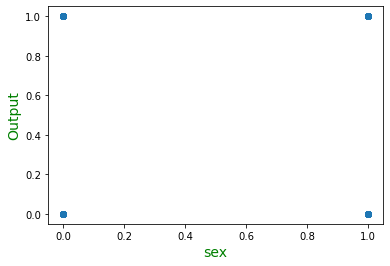

scatter plot between cp and output 



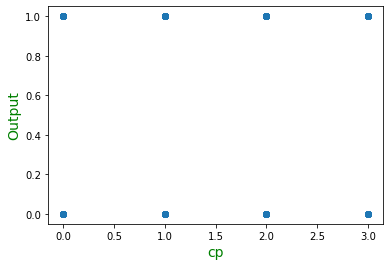

scatter plot between trtbps and output 



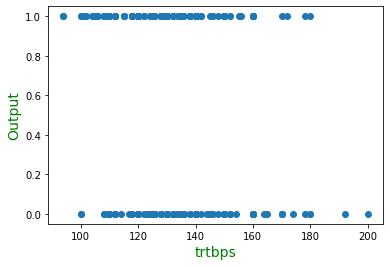

scatter plot between chol and output 



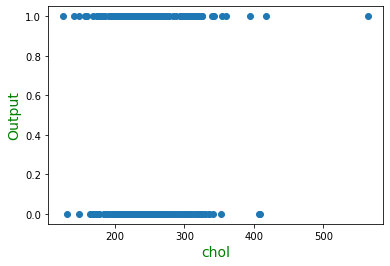

scatter plot between fbs and output 



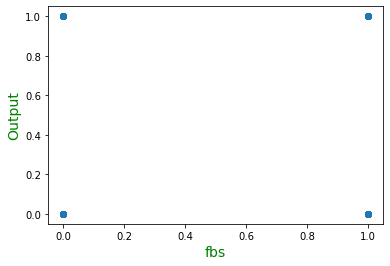

scatter plot between restecg and output 



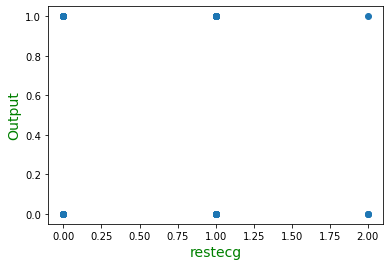

scatter plot between thalachh and output 



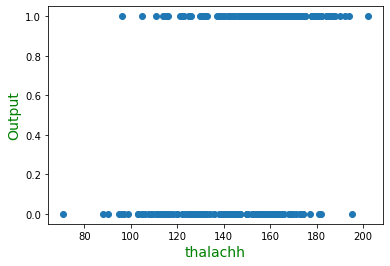

scatter plot between exng and output 



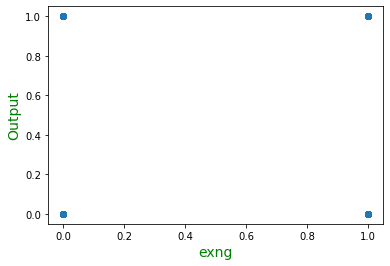

scatter plot between oldpeak and output 



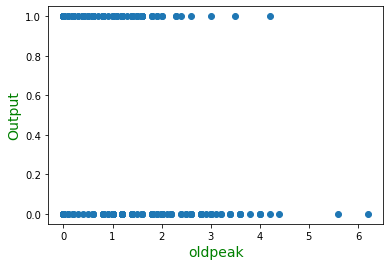

scatter plot between slp and output 



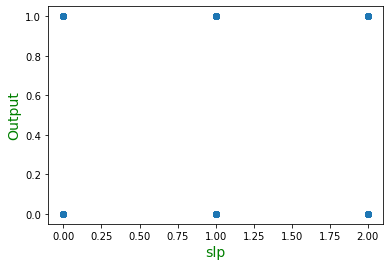

scatter plot between caa and output 



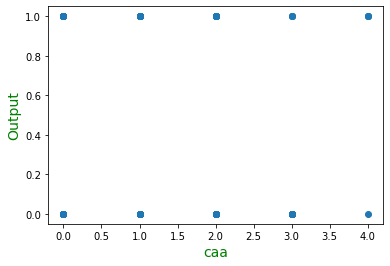

scatter plot between thall and output 



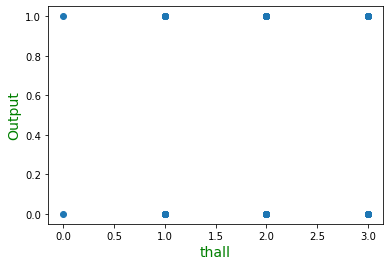

In [54]:
cols = ['age','sex','cp','trtbps','chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']

for i in cols:
    
    print("scatter plot between {} and output \n".format(i))
    plt.scatter(df[i],df['output'] )
    plt.ylabel("Output" ,color = "green" , size = 14)
    plt.xlabel(i,color = "green" , size = 14)
    plt.show()

In [55]:
# by seeing we can say that Logistic regression will work better, all the plots showing S shaped curves

<Figure size 1008x864 with 0 Axes>

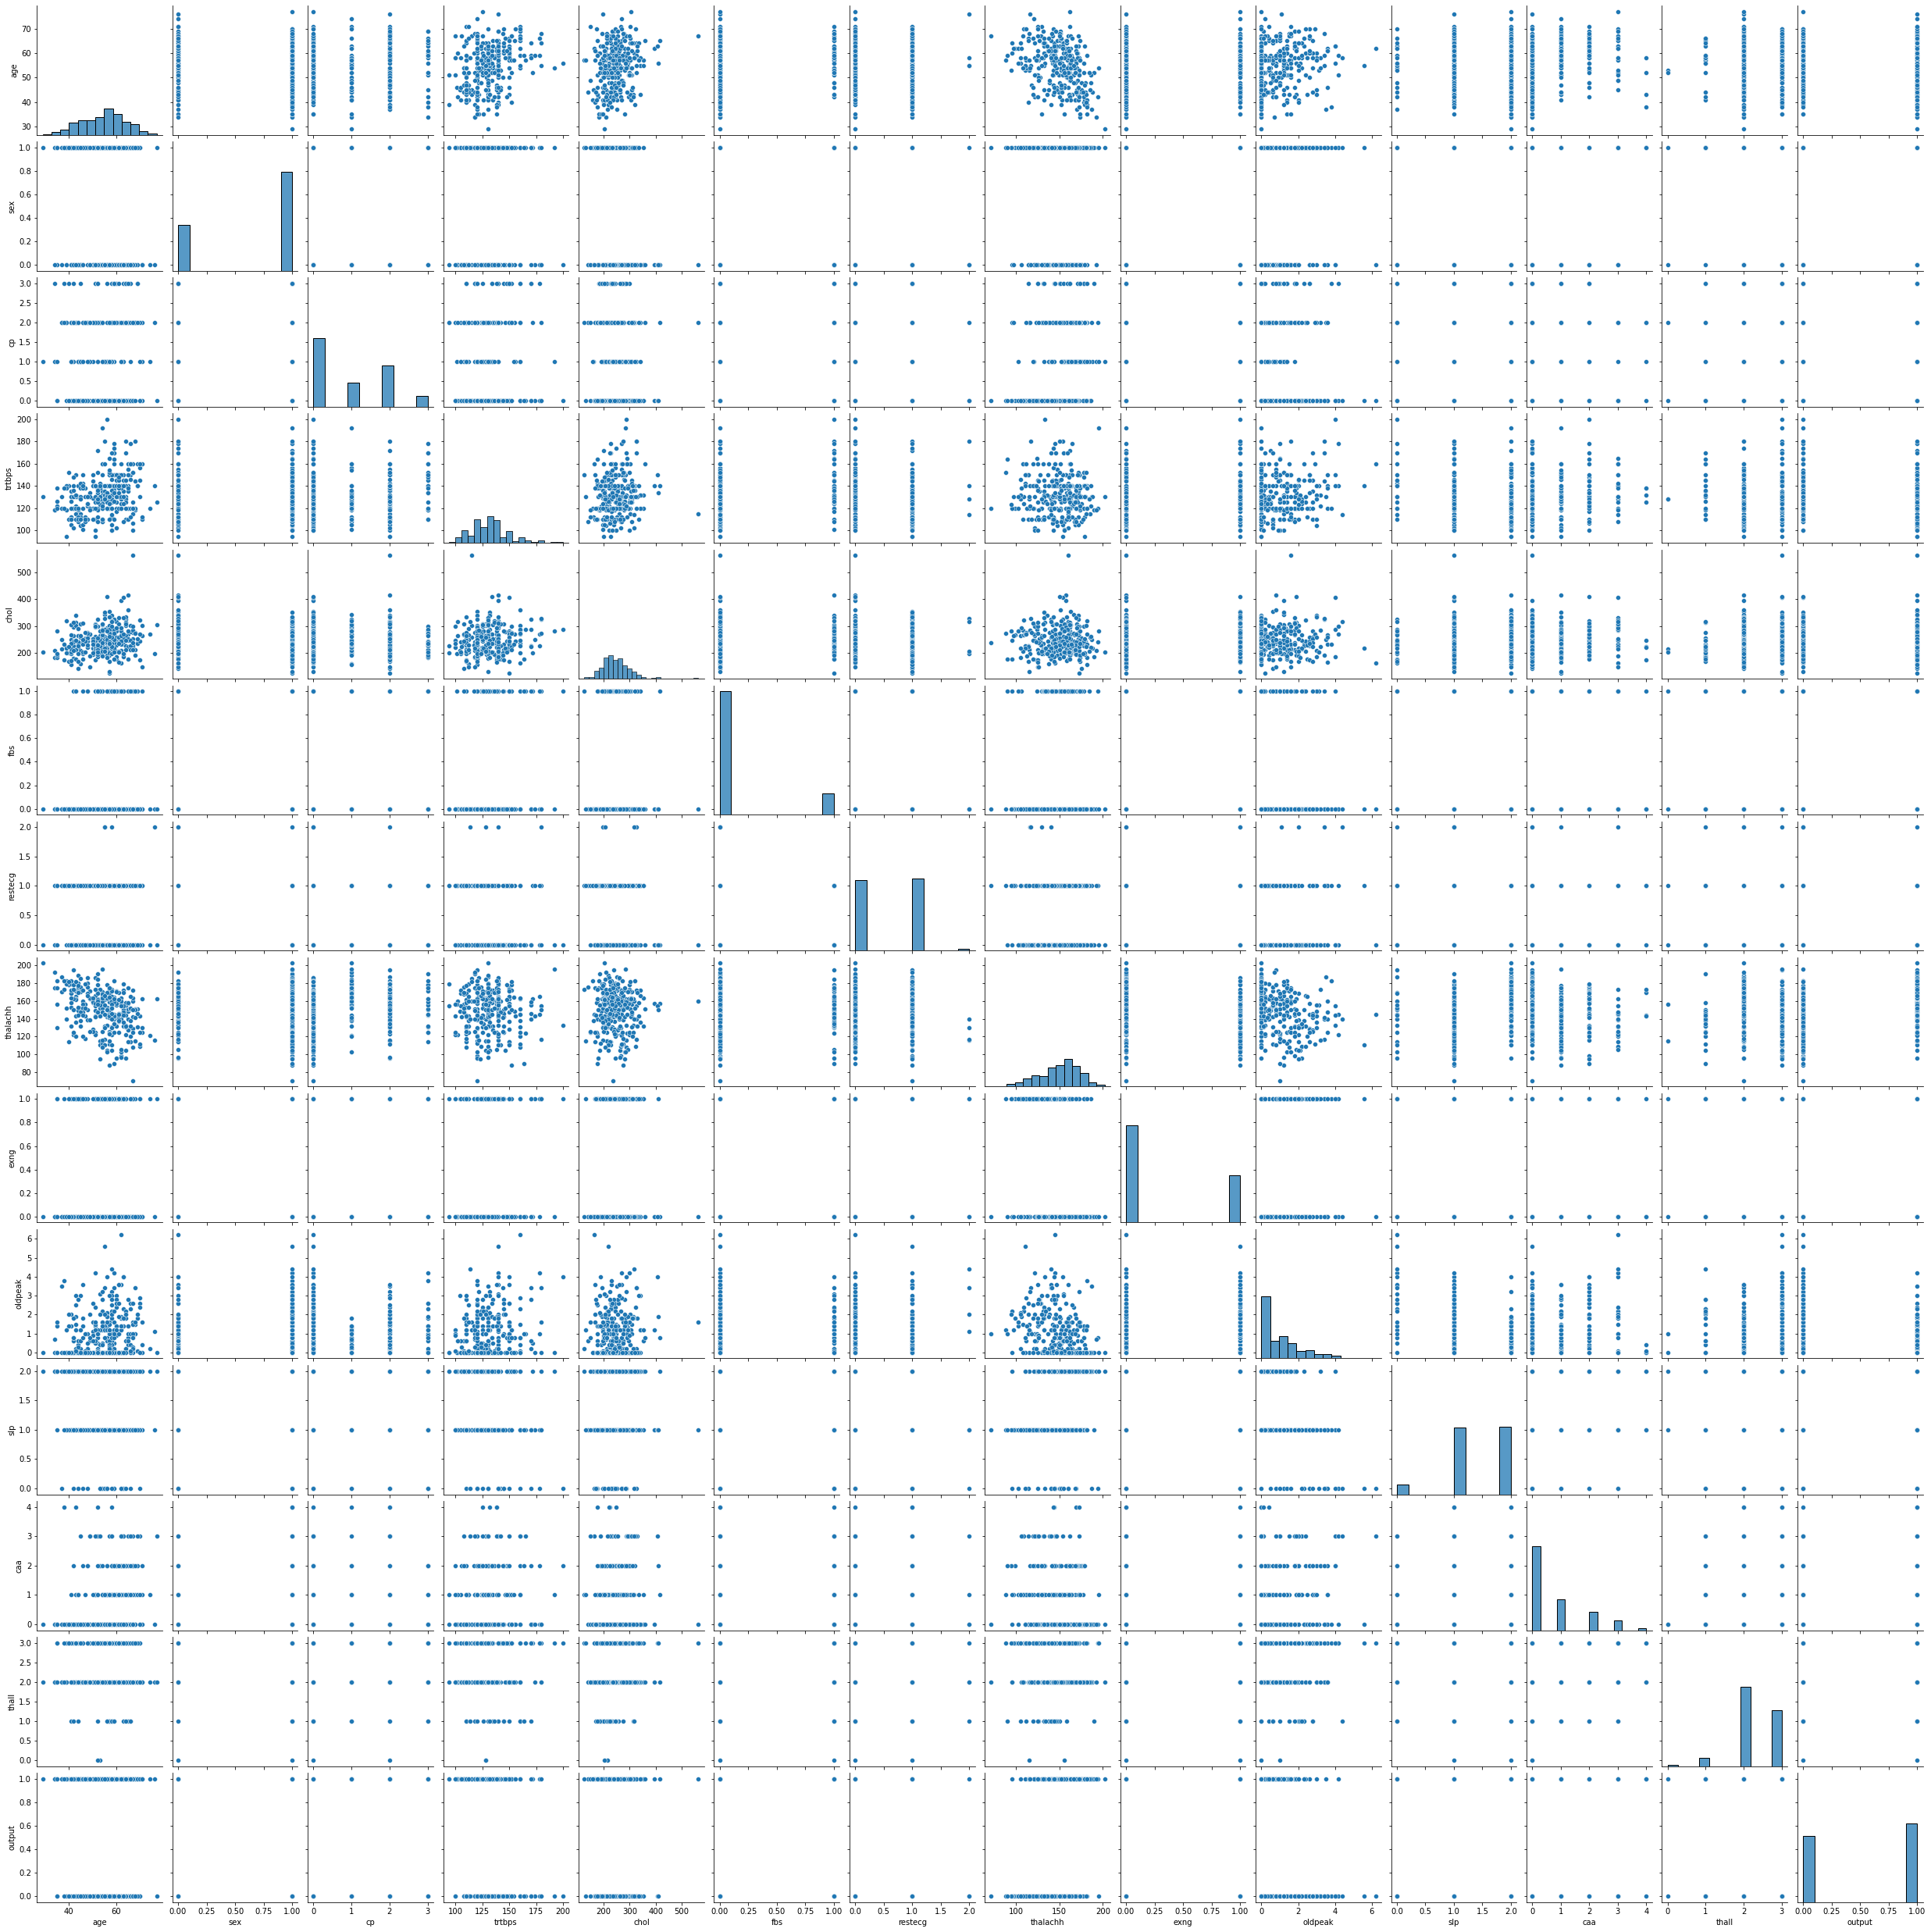

In [56]:
# Pair plot

plt.figure(figsize=(14,12))

sns.pairplot(df)

plt.show()

### Logistic regression

In [57]:
X = df.drop('output', axis=1) # X = all input variables

y = df.output # target variable

In [59]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [60]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [313]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.25, random_state=229)
# random_state = 2, for checking purpose
# train data = 70%
# test data = 30%

In [314]:
# checking the shape

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(226, 13)
(76, 13)
(226,)
(76,)


In [315]:
# importing metrics
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix, roc_curve,auc,roc_auc_score

# importing model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [316]:
model

LogisticRegression()

In [317]:
# fitting the train data

model.fit(xtrain, ytrain)

LogisticRegression()

In [318]:
# u can check the score/accuracy of our dataset on test data

model.score(xtest,ytest)

# almost 88% accuracy, but not good our data is heart prediction remaining 12 % is wrong

0.9473684210526315

In [319]:
model.intercept_

array([0.07493498])

In [320]:
model.coef_

array([[ 0.01226317, -0.97950353,  0.70986337, -0.01796646, -0.00262804,
        -0.10840921,  0.59374719,  0.02689866, -0.5909377 , -0.44976447,
         0.5184439 , -0.67564481, -0.6629664 ]])

In [321]:
model_pred = model.predict(xtest)
model_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [322]:
model_pred.shape # 91 predictions

(76,)

In [323]:
#accuracy
accuracy_score(ytest, model_pred)

0.9473684210526315

In [324]:
# confusion matrix
confusion_matrix(ytest, model_pred)

array([[38,  3],
       [ 1, 34]], dtype=int64)

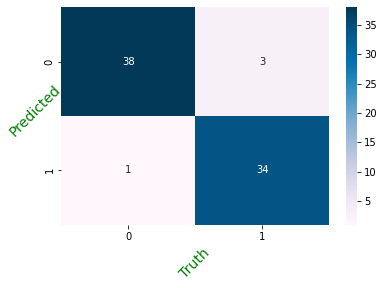

In [325]:
# confusion matrix - visualizing


sns.heatmap(confusion_matrix(ytest, model_pred), annot= True , cmap="PuBu")

plt.xlabel("Truth" , rotation = 45 , color = "green",size = 14)
plt.ylabel("Predicted",  rotation = 45 , color = "green",size = 14)
plt.show()

In [232]:
print(classification_report(ytest, model_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        37
           1       0.85      1.00      0.92        39

    accuracy                           0.91        76
   macro avg       0.92      0.91      0.91        76
weighted avg       0.92      0.91      0.91        76



In [233]:
xtest

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2


In [234]:
model_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [235]:
logistic_1 = pd.DataFrame(xtest)

In [236]:
logistic_1['output'] = model_pred

In [237]:
logistic_1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,1
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1


In [238]:
logistic_1[logistic_1['output'] == 1]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,1
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1


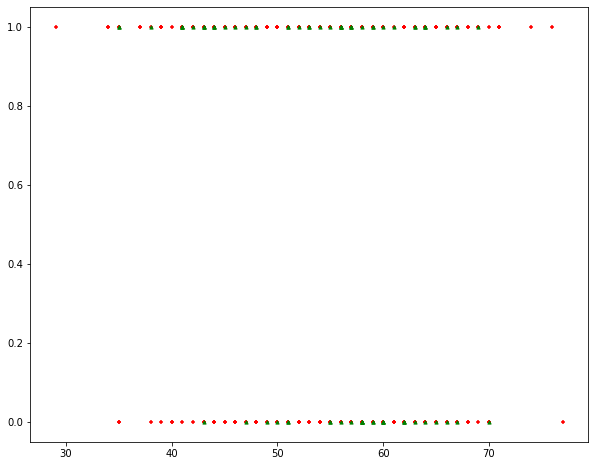

In [239]:
plt.figure(figsize=(10,8))
plt.scatter(df['age'],df['output'], marker= "+", s= 12, color = "red")
plt.scatter(logistic_1['age'], logistic_1['output'], marker="^", s = 10, color = "green")

plt.show()

scatter plot between age and output 

scatter plot between age and output 



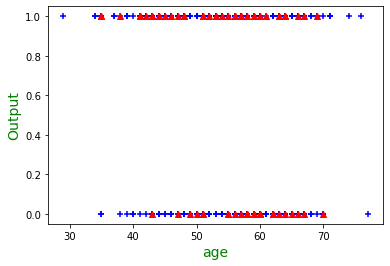

scatter plot between sex and output 

scatter plot between sex and output 



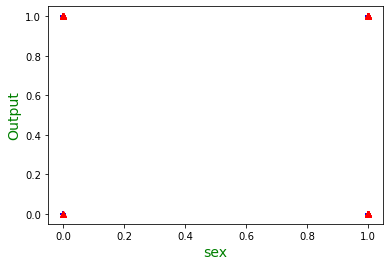

scatter plot between cp and output 

scatter plot between cp and output 



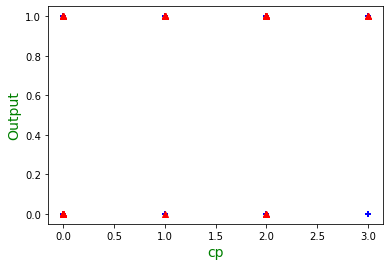

scatter plot between trtbps and output 

scatter plot between trtbps and output 



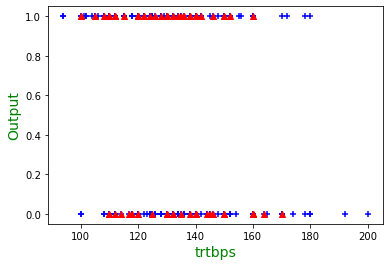

scatter plot between chol and output 

scatter plot between chol and output 



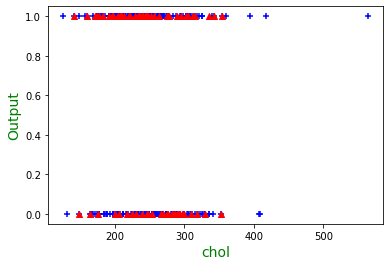

scatter plot between fbs and output 

scatter plot between fbs and output 



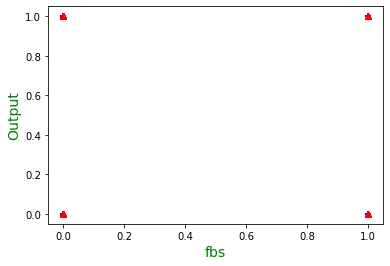

scatter plot between restecg and output 

scatter plot between restecg and output 



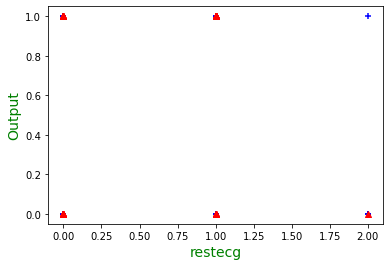

scatter plot between thalachh and output 

scatter plot between thalachh and output 



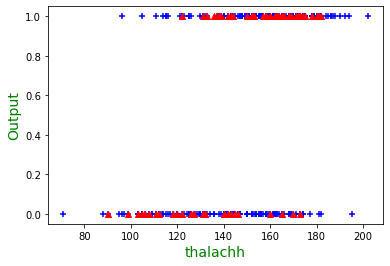

scatter plot between exng and output 

scatter plot between exng and output 



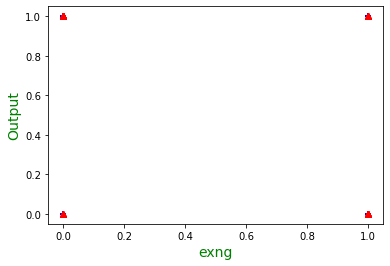

scatter plot between oldpeak and output 

scatter plot between oldpeak and output 



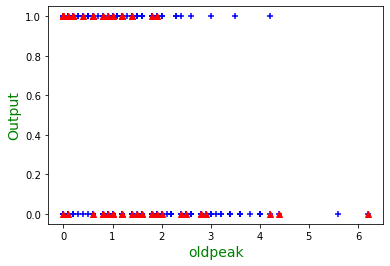

scatter plot between slp and output 

scatter plot between slp and output 



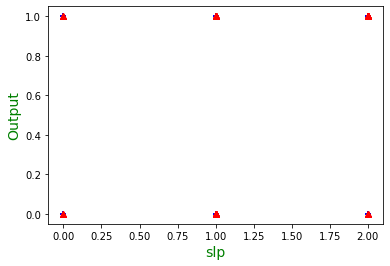

scatter plot between caa and output 

scatter plot between caa and output 



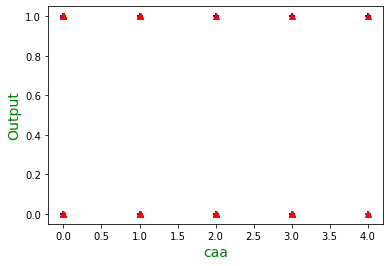

scatter plot between thall and output 

scatter plot between thall and output 



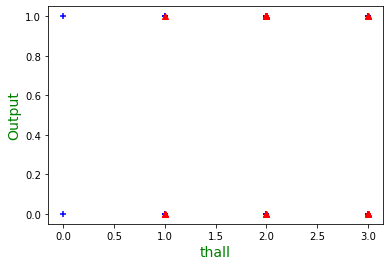

In [240]:
# red = predicted
# blue = original

cols = ['age','sex','cp','trtbps','chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']

for i in cols:
    
    print("scatter plot between {} and output \n".format(i))
    plt.scatter(df[i],df['output'] ,color = "blue", marker="+")
    print("scatter plot between {} and output \n".format(i))
    plt.scatter(logistic_1[i] , logistic_1['output'],color = "red", marker="^")
    plt.ylabel("Output" ,color = "green" , size = 14)
    plt.xlabel(i,color = "green" , size = 14)
    plt.show()

## 2nd time train = 90, test = 10

In [116]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [117]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [158]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

In [159]:
model__1 = LogisticRegression()

In [160]:
model__1.fit(X_train, y_train)
model__1.score(X_test, y_test)

0.967741935483871

In [161]:
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0


In [162]:
model

LogisticRegression()

In [310]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.25, random_state=229)

In [311]:
model.fit(xtrain, ytrain)

LogisticRegression()

In [312]:
model.score(xtest, ytest)

0.9473684210526315

In [410]:
sc = []

for i in range(0,500):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.30, random_state= i)
    model.fit(xtrain, ytrain)
    sc.append(model.score(xtest, ytest))
    

In [411]:
for i in range(len(sc)):
    if sc[i]>0.9:
        print(i,sc[i])


9 0.9010989010989011
120 0.9120879120879121
128 0.9010989010989011
138 0.9230769230769231
156 0.9010989010989011
229 0.9230769230769231
321 0.9120879120879121
323 0.9010989010989011
375 0.9010989010989011
472 0.9230769230769231


In [414]:
sc = []

for i in range(1,900):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.25, random_state= i)
    model.fit(xtrain, ytrain)
    sc.append(model.score(xtest, ytest))
    

In [415]:
for i in range(len(sc)):
    if sc[i]>0.9:
        print(i,sc[i])


1 0.9078947368421053
8 0.9078947368421053
127 0.9078947368421053
137 0.9210526315789473
152 0.9078947368421053
185 0.9210526315789473
228 0.9473684210526315
393 0.9078947368421053
471 0.9078947368421053
478 0.9078947368421053
518 0.9078947368421053
657 0.9210526315789473
697 0.9473684210526315
707 0.9078947368421053
721 0.9210526315789473
766 0.9078947368421053
767 0.9078947368421053
787 0.9078947368421053
871 0.9210526315789473


In [329]:
ytest[ytest==0].shape

(41,)

In [330]:
ytest[ytest==1].shape

(35,)